# Import the training log files

In [2]:
import ast

In [204]:
log_paths = ['/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5-infos/train.log',
             '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5/train.log']
#name_exp = ['5pt with IDs', '5pt with IDs - old', '5pt without IDs', '5pt without IDs - old']
name_exp = ['5pt with IDs', '5pt without IDs']

#log_paths = ['/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt8-infos_exp2/train.log',
 #           '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt8_exp2/train.log',
  #          '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt8-infos_exp2b/train.log',
   #         '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt8_exp2b/train.log']
#name_exp = ['8pt with IDs', '8pt without IDs', '8pt with IDs - combined tokens', '8pt without IDs combined - tokens']

#log_paths = ['/Users/aurelien/PycharmProjects/spinorhelicity/experiments/simplify/train.log']
#name_exp = ["Trig Simplify"]

In [205]:
all_lines = []

for log_path in log_paths:

  logfile = open(log_path, 'r')
  lines = logfile.read().splitlines()
  all_lines.append(lines)
  logfile.close()
    
full_important_lines = []
for lines in all_lines:
  important_lines = []
  for line in lines:
    if '__log__:' in line:
      important_lines.append(ast.literal_eval(line.split('__log__:')[1]))
  full_important_lines.append(important_lines)

### Check that we get the data by reading the final accuracy value

In [206]:
task = 'spin_hel'
full_important_lines[0][0]['test_'+task+'_acc']

0.020145044319097503

# Plot the Results

In [207]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('classic')
plt.style.use('seaborn-whitegrid')

### Accuracy plot as a function of the epoch number

In [208]:
full_epochs = []
full_valid_acc = []
full_test_acc = []

for important_lines in full_important_lines:

  epochs = []
  valid_acc = []
  test_acc = []

  for line in important_lines:
    epochs.append(line['epoch'])
    valid_acc.append(line['valid_'+task+'_acc'])
    test_acc.append(line['test_'+task+'_acc'])
  
  full_epochs.append(epochs)
  full_valid_acc.append(valid_acc)
  full_test_acc.append(test_acc)

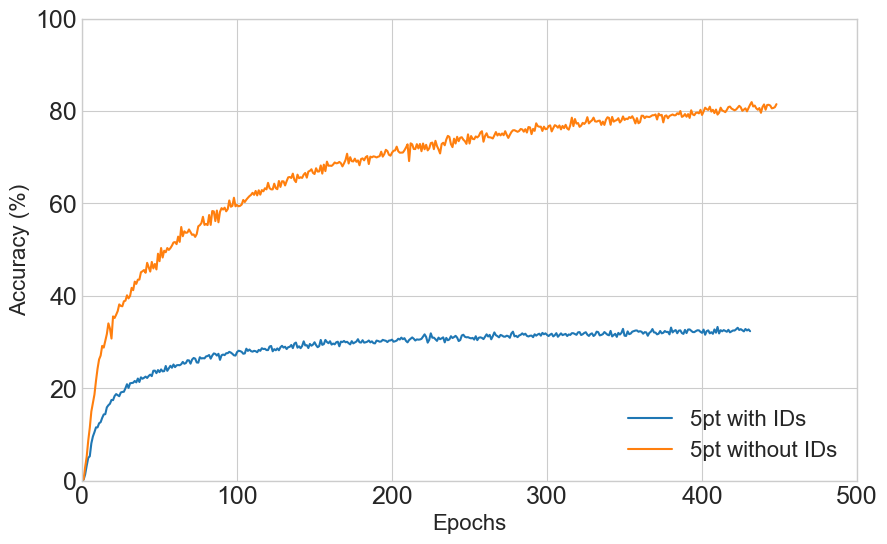

In [209]:
fig, axes = plt.subplots(1,1,figsize=(10,6))
plt.rcParams.update({'font.size': 16}) 
#fig.suptitle('Training accuracy - validation set',fontsize='15')

for i, name in enumerate(name_exp):

  axes.plot(full_epochs[i], full_valid_acc[i], label=name_exp[i])

axes.legend(loc='lower right',fontsize='16')
axes.set_xlabel('Epochs',fontsize='16')
plt.xlim([0, 500])
plt.ylim([0, 100])
axes.set_ylabel('Accuracy (%)',fontsize='16')
plt.show()
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/train_accuracy.pdf')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/train_accuracy.png')

### Loss plot as a function of the epoch number

In [210]:
full_epochs = []
full_valid_loss = []
full_test_loss = []

for important_lines in full_important_lines:

  epochs = []
  valid_loss = []
  test_loss = []

  for line in important_lines:
    epochs.append(line['epoch'])
    valid_loss.append(line['valid_'+task+'_xe_loss'])
    test_loss.append(line['test_'+task+'_xe_loss'])
  
  full_epochs.append(epochs)
  full_valid_loss.append(valid_loss)
  full_test_loss.append(test_loss)

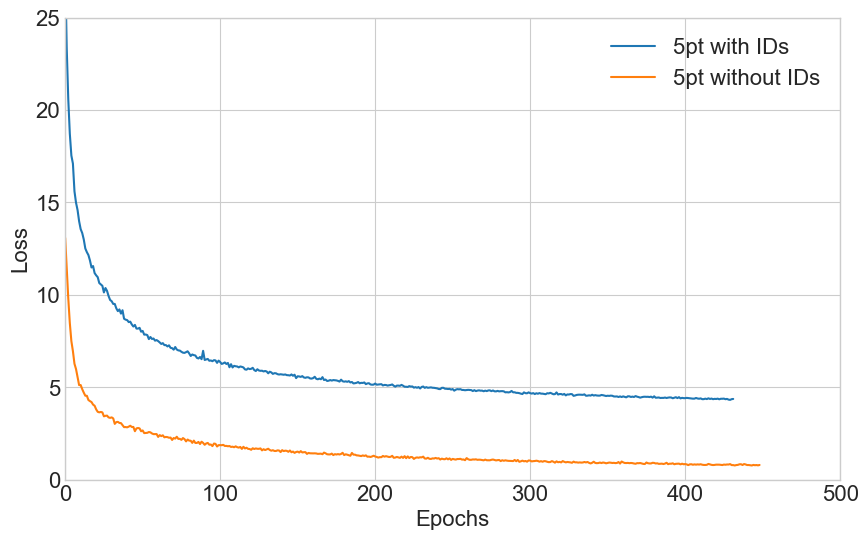

In [211]:
fig, axes = plt.subplots(1,1,figsize=(10,6))
#fig.suptitle('Loss accuracy - validation set',fontsize='15')

for i, name in enumerate(name_exp):

  axes.plot(full_epochs[i], full_valid_loss[i], label=name_exp[i])

axes.legend(loc='upper right',fontsize='16')
axes.set_xlabel('Epochs',fontsize='16')
axes.set_ylabel('Loss',fontsize='16')
plt.xlim([0, 500])
plt.ylim([0, 25])
plt.show()
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/train_loss.pdf')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/train_loss.png')

### Final accuracy as a function of input length

In [212]:
full_cat_num_valid = []
full_valid_values = []
full_cat_num_test = []
full_test_values = []

for important_lines in full_important_lines:

  cat_num_valid = []
  valid_values = []
  cat_num_test = []
  test_values = []

  for key, value in important_lines[-1].items():
    if 'valid_'+task+'_acc_' in key:
      cat_num_valid.append(int(key.split('valid_'+task+'_acc_')[1]))
      valid_values.append(value)
    
    if 'test_'+task+'_acc_' in key:
      cat_num_test.append(int(key.split('test_'+task+'_acc_')[1]))
      test_values.append(value)
  
  full_cat_num_valid.append(cat_num_valid)
  full_valid_values.append(valid_values)
  full_cat_num_test.append(cat_num_test)
  full_test_values.append(test_values)

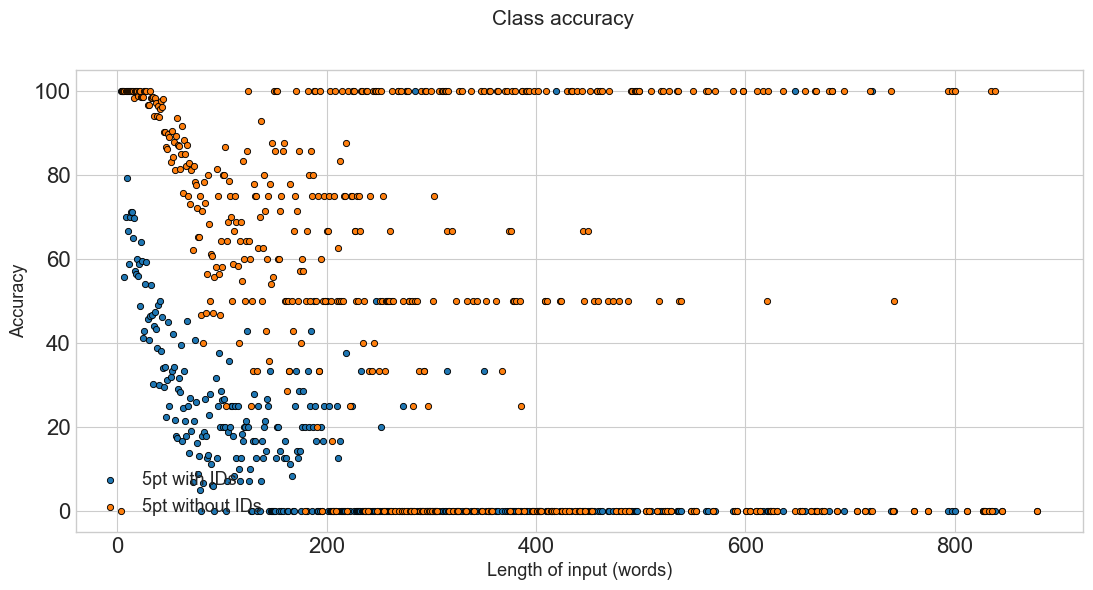

In [213]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig, axes = plt.subplots(1,1,figsize=(13,6))
fig.suptitle('Class accuracy',fontsize='15')

for i, name in enumerate(name_exp):

  axes.scatter(full_cat_num_valid[i], full_valid_values[i], label=name_exp[i],s=20,edgecolors='black',linewidth=0.65, c= colors[i])

axes.legend(loc='lower left',fontsize='13')
axes.set_xlabel('Length of input (words)',fontsize='13')
axes.set_ylabel('Accuracy',fontsize='13')
plt.show()
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt8_exp1/train_class.pdf')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt8_exp1/train_class.png')

# Import the evaluation log files

In [80]:
eval_file_num = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/dumped/Test_eval_spin_hel/npt5_b1n/eval.spin_hel.valid.0'
#eval_file_symb ='/Users/aurelien/PycharmProjects/spinorhelicity/experiments/dumped/Test_eval_spin_hel/npt6-infos_b1n/eval.spin_hel.valid.0'
eval_file_symb= None
eval_path2 = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/dumped/Test_eval_spin_hel/npt5-infos_b1n/eval.spin_hel.valid.0'
eval_prefix_path = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5-infos/data.prefix.counts.valid'
name_exp = 'without_ids'
bs = 1
bl = 4

In [81]:
def read_file(log_path):
    if log_path is None:
        return None
    
    all_lines = []
    logfile = open(log_path, 'r')
    lines = logfile.read().splitlines()
    all_lines.append(lines)
    logfile.close()
    
    return all_lines[0]

eval_lines_num = read_file(eval_file_num)
eval_lines_symb = read_file(eval_file_symb)

In [82]:
def split_into_eq(lines, beam_size, base_length):
    
    if lines is None:
        return None
    
    return [lines[i:i+beam_size+base_length] for i in range(0, len(lines), beam_size+base_length)]

equations_eval_num = split_into_eq(eval_lines_num, bs, bl)
equations_eval_symb = split_into_eq(eval_lines_symb, bs, bl)

In [125]:
import re
import pandas as pd

def construct_info_equations(equations_list):
    """
    Construct the vector with all of the necessary information regarding the evaluation run
    Length of input/ output / number of scrambles and validity of the hypothesis
    """
    
    if equations_list is None:
        return None
    
    list_info = []
    
    for equation in equations_list:
        dict_info = {}
        dict_info['Eq_ID'] = int(equation[0].split('n ')[1].split(' (')[0])
        dict_info['In_len'] = equation[1].count('ab') + equation[1].count('sb')
        dict_info['Out_len'] = equation[2].split('IDS')[0].count('ab') + equation[2].split('IDS')[0].count('sb')
        dict_info['Num_IDs'] = equation[2].count('/A') + equation[2].count('/M') + equation[2].count('/S') + equation[2].count('/Z') + equation[2].count('/ID')
        dict_info['Size_inc'] = round((equation[1].count('ab') + equation[1].count('sb'))/(max(equation[2].split('IDS')[0].count('ab') + equation[2].split('IDS')[0].count('sb'), 1)))
        dict_info['Valid'] = int(equation[0].split('/')[0][-1]) * 100
        dict_info['N_pt'] = max([int(eq) for i, eq in enumerate(equation[1]) if eq.isdigit() and equation[1][i-2]=='b'])
        
        list_info.append(dict_info)
    
    return pd.DataFrame.from_records(list_info)


def construct_info_prefix(prefix_list_path):
    
    equations_list = read_file(prefix_list_path)
    
    if equations_list is None:
        return None
    
    list_info = []
    
    for equation in equations_list:
        
        input_eq = equation.split('\t')[0][2:]
        output_eq = equation.split('\t')[1]
        
        dict_info = {}
        dict_info['In_len'] = input_eq.count('ab') + input_eq.count('sb')
        dict_info['Out_len'] = output_eq.split('&')[0].count('ab') + output_eq.split('&')[0].count('sb')
        dict_info['Num_IDs'] = output_eq.count('A') + output_eq.count('M') + output_eq.count('S') + output_eq.count('Z') + output_eq.count('ID')
        dict_info['Size_inc'] = round((input_eq.count('ab') + input_eq.count('sb'))/(max(output_eq.split('&')[0].count('ab') + output_eq.split('&')[0].count('sb'), 1)))
        dict_info['N_pt'] = max([int(eq) for i, eq in enumerate(input_eq) if eq.isdigit() and input_eq[i-2]=='b'])
        
        list_info.append(dict_info)
    
    return pd.DataFrame.from_records(list_info)


def merge_info(info_num, info_symb):
    """
    Combine the score obtained with symbolic evaluation and numerical evaluation
    """
    if info_symb is None:
        return info_num
    
    else:
        info_num['Valid_symb'] = info_symb['Valid']
        return info_num
    
    
def add_info_ids(info_frame, eval_valid_path=None, prefix_valid_path=None):
    """
    Add the information regarding the number of identities used
    """
    if eval_valid_path is not None:
        eqs_list = split_into_eq(read_file(eval_valid_path), bs, bl)
        num_ids = []
        for equation in eqs_list:
            num_ids.append(equation[2].count('/A') + equation[2].count('/M') + equation[2].count('/S') + equation[2].count('/Z') + equation[2].count('/ID'))
            
    elif prefix_valid_path is not None:
        eqs_list = read_file(prefix_valid_path)
        num_ids = []
        for equation in eqs_list:
            num_ids.append(equation.count('A') + equation.count('M') + equation.count('S')+ equation.count('Z') + equation.count('ID'))
    
    else:
        return info_frame
    
    assert info_eq.shape[0] == len(num_ids)
    info_frame['Num_IDs'] = num_ids
    
    return info_frame


In [92]:
info_eq_num = construct_info_equations(equations_eval_num)
info_eq_symb = construct_info_equations(equations_eval_symb)

info_eq = merge_info(info_eq_num, info_eq_symb)

if 'info' not in eval_file_num:
    info_eq = add_info_ids(info_eq, eval_valid_path=eval_path2)

In [93]:
def print_stats(info_frame):
    """
    Print the overall statistics over the evaluation run
    """
    print("Inputs had a mean length of {:0.2f}".format(info_frame['In_len'].mean()))
    print("Outputs had a mean length of {:0.2f}".format(info_frame['Out_len'].mean()))
    print("Inputs had a mean number external momenta of {:0.2f}".format(info_frame['N_pt'].mean()))
    print("Average size increase of {:0.2f}".format(info_frame['Size_inc'].mean()))
    print("We used {:0.2f} identities on average".format(info_frame['Num_IDs'].mean()))
    print("Mean numerical accuracy : {:0.2f} %".format(info_frame['Valid'].mean()))
    
    if 'Valid_symb' in list(info_frame.columns):
            print("Mean symbolic accuracy : {:0.2f} %".format(info_frame['Valid_symb'].mean()))

    
print_stats(info_eq)

Inputs had a mean length of 65.71
Outputs had a mean length of 6.43
Inputs had a mean number external momenta of 5.00
Average size increase of 15.25
We used 2.73 identities on average
Mean numerical accuracy : 81.90 %


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


def print_accuracy_group(info_frame, column_metric, info_exp=''):
    
    group_frame = info_frame.groupby([column_metric]).mean()
    group_frame.reset_index(inplace=True)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    plt.rcParams.update({'font.size': 18}) 
    plt.style.use('seaborn-whitegrid')
    
    sns.lineplot(data=group_frame, x=column_metric, y='Valid',  linestyle='dashed', marker='o', legend='brief', label='Numerical matching')
    
    if 'Valid_symb' in list(info_frame.columns):
        sns.lineplot(data=group_frame, x=column_metric, y='Valid_symb',  linestyle='dashed', marker='o', legend='brief', label='Symbolic matching')


    
    plt.ylabel("Correct prediction (%)",fontsize=18)
    plt.xlabel(column_metric, fontsize=18)
    plt.ylim([0, 100])
    plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/{}.pdf'.format(column_metric+info_exp), bbox_inches='tight')
    plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/{}.png'.format(column_metric+info_exp), bbox_inches='tight')

    plt.show()

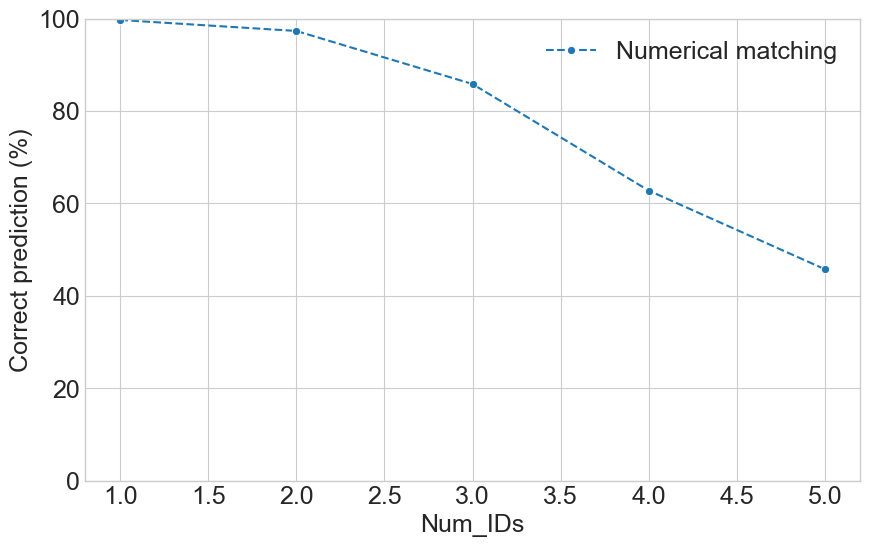

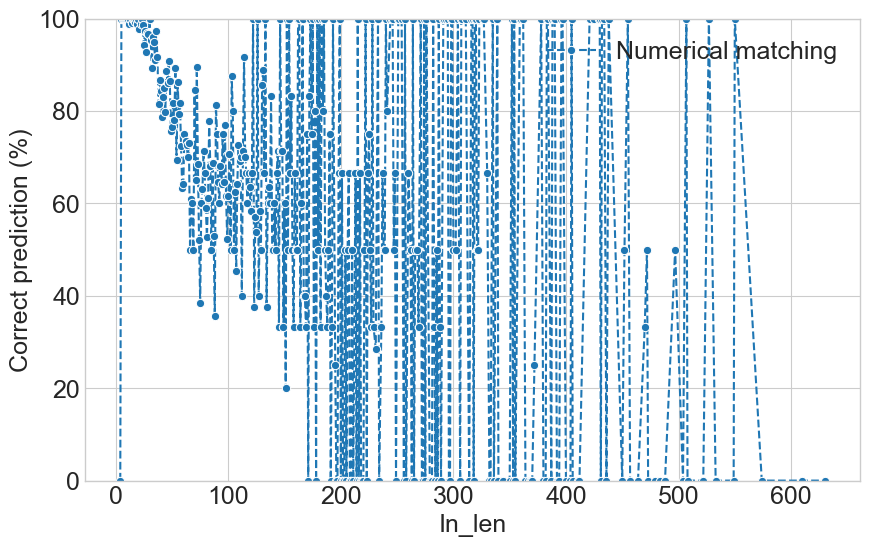

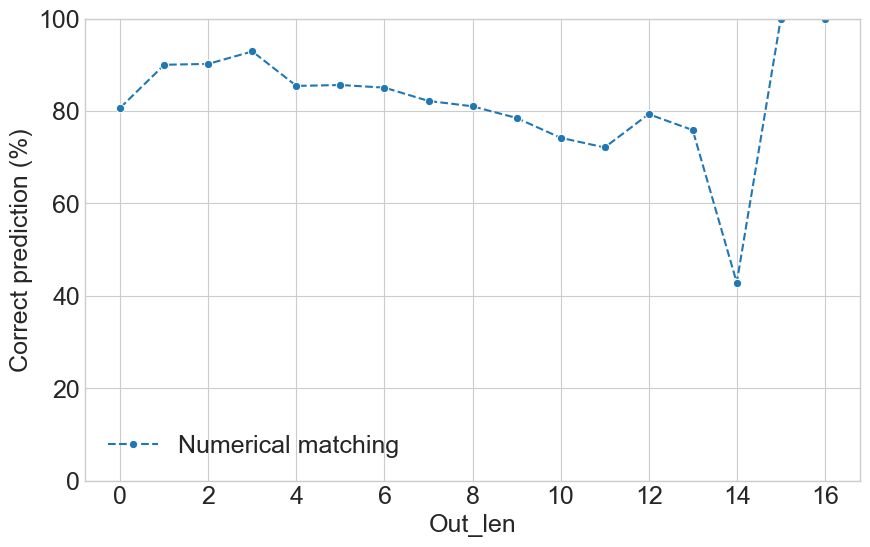

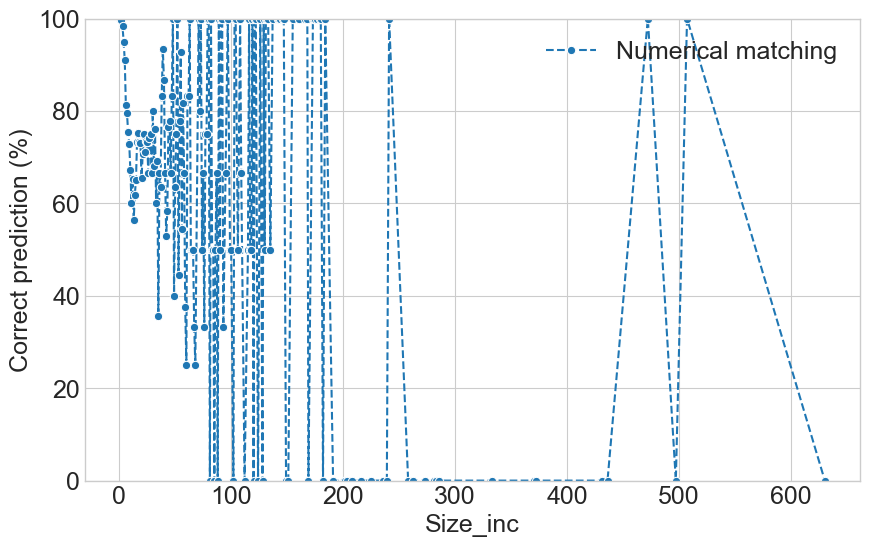

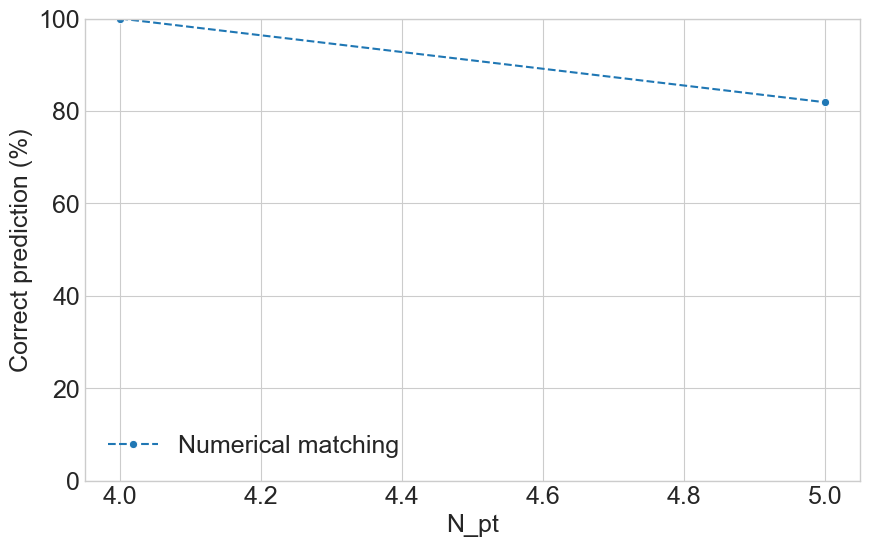

In [86]:
print_accuracy_group(info_eq, 'Num_IDs', info_exp='_' + name_exp)
print_accuracy_group(info_eq, 'In_len', info_exp='_' + name_exp)
print_accuracy_group(info_eq, 'Out_len', info_exp='_' + name_exp)
print_accuracy_group(info_eq, 'Size_inc', info_exp='_' + name_exp)
print_accuracy_group(info_eq, 'N_pt', info_exp='_' + name_exp)

# Details on Evaluation Data

In [214]:
#path_prefix_file = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5-infos/data.prefix.counts.valid'
path_prefix_file = '/Users/aurelien/PycharmProjects/spinorhelicity/experiments/npt5-infos/random_train_sample.counts'
info_eq_summary=construct_info_prefix(path_prefix_file)

#### Can use the previously generated information table

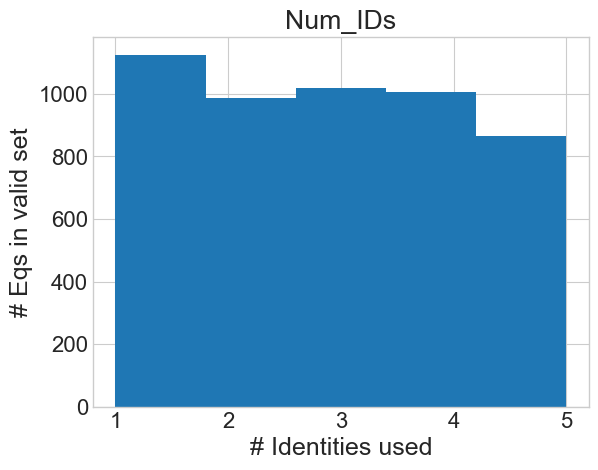

In [215]:
metric = 'Num_IDs'
info_eq_summary.hist(column=[metric], bins=5)
plt.ylabel("# Eqs in valid set",fontsize=18)
plt.xlabel("# Identities used",fontsize=18)

#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}_random.pdf'.format(metric), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}_random.png'.format(metric), bbox_inches='tight')

plt.show()

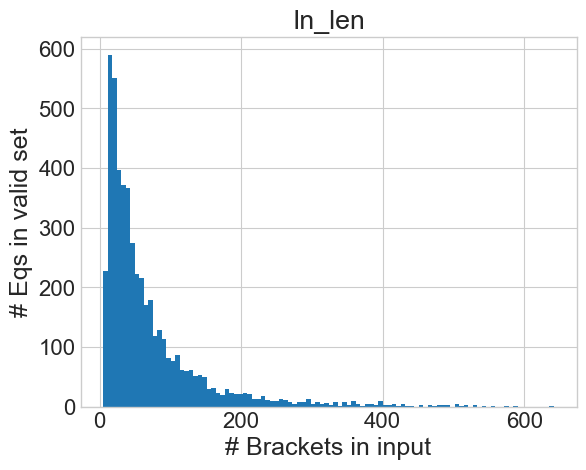

In [216]:
metric = 'In_len'
info_eq_summary.hist(column=[metric], bins=100)
plt.ylabel("# Eqs in valid set",fontsize=18)
plt.xlabel("# Brackets in input",fontsize=18)


#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.pdf'.format(metric), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.png'.format(metric), bbox_inches='tight')


plt.show()

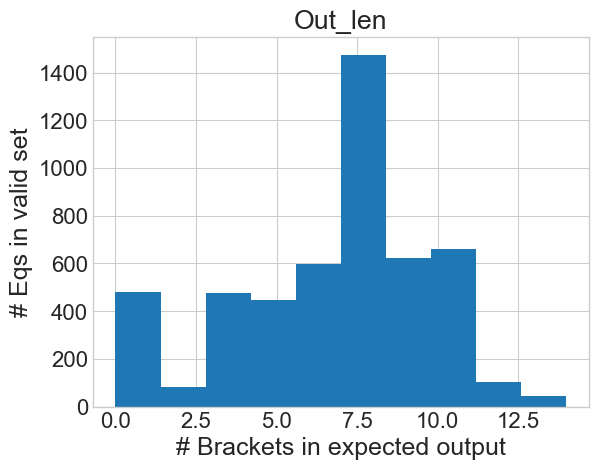

In [217]:
metric = 'Out_len'
info_eq_summary.hist(column=[metric], bins=10)
plt.ylabel("# Eqs in valid set",fontsize=18)
plt.xlabel("# Brackets in expected output",fontsize=18)


#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.pdf'.format(metric), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.png'.format(metric), bbox_inches='tight')


plt.show()

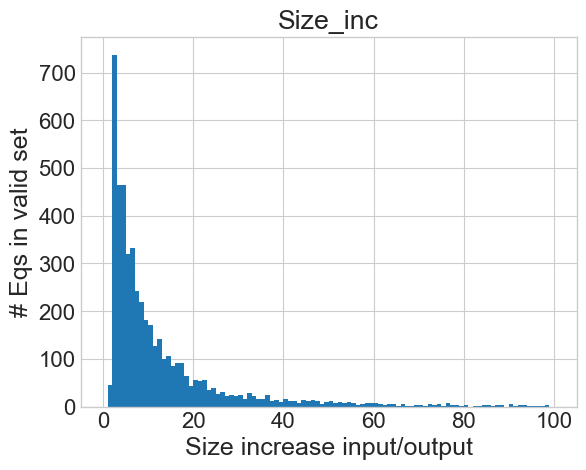

In [218]:
metric = 'Size_inc'
info_eq_summary.hist(column=[metric], bins=100, range=[0, 100])
plt.ylabel("# Eqs in valid set",fontsize=18)
plt.xlabel("Size increase input/output",fontsize=18)


#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.pdf'.format(metric), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.png'.format(metric), bbox_inches='tight')


plt.show()

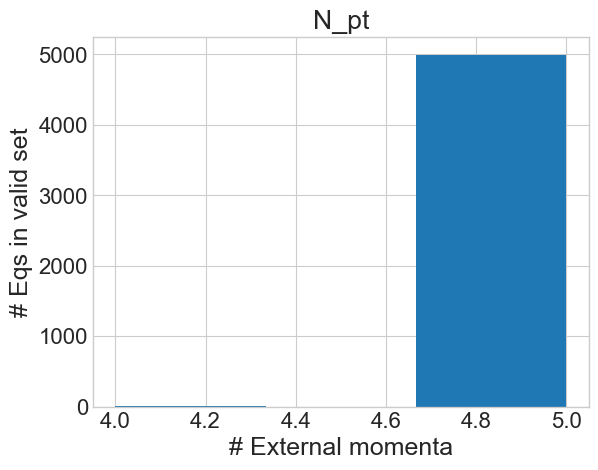

In [219]:
metric = 'N_pt'
info_eq_summary.hist(column=[metric], bins=3)
plt.ylabel("# Eqs in valid set",fontsize=18)
plt.xlabel("# External momenta",fontsize=18)

#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.pdf'.format(metric), bbox_inches='tight')
#plt.savefig('/Users/aurelien/Documents/Projects/Spinor_helicity/pictures/npt5_exp1/data_{}.png'.format(metric), bbox_inches='tight')

plt.show()